In [ ]:
!pip install Pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.datasets import load_sample_image
import numpy as np
china = load_sample_image("china.jpg")/255
flower = load_sample_image("flower.jpg")/255
images = np.array([china,flower])
batch_size,height,width,channels = images.shape

In [ ]:
filters = np.zeros(shape=(7,7,channels,2), dtype=np.float32)

filters[:,3,:,0]=1
filters[3,:,:,1]

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]], dtype=float32)

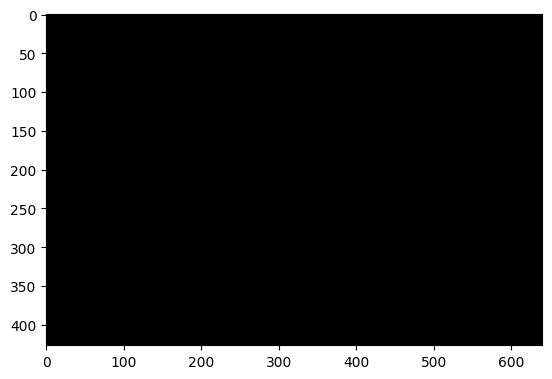

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
outputs= tf.nn.conv2d(images,filters,strides=1,padding="SAME")

plt.imshow(outputs[0,:,:,1],cmap="gray")
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize input images
x_train = x_train / 255.0
x_test = x_test / 255.0

# Convert labels to one-hot encoding
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Define model architecture
model = Sequential()
model.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(x_train.reshape(-1,28,28,1), y_train, batch_size=32, epochs=10, validation_data=(x_test.reshape(-1,28,28,1), y_test))

# Evaluate model on test dataset
score = model.evaluate(x_test.reshape(-1,28,28,1), y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])


11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/10
1875/1875 [==============================] - 35s 17ms/step - loss: 0.1797 - accuracy: 0.9466 - val_loss: 0.0642 - val_accuracy: 0.9800
Epoch 2/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.0621 - accuracy: 0.9802 - val_loss: 0.0530 - val_accuracy: 0.9824
Epoch 3/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0453 - accuracy: 0.9860 - val_loss: 0.0339 - val_accuracy: 0.9886
Epoch 4/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.0350 - accuracy: 0.9892 - val_loss: 0.0376 - val_accuracy: 0.9872
Epoch 5/10
1875/1875 [==============================] - 35s 19ms/step - loss: 0.0297 - accuracy: 0.9904 - val_loss: 0.0418 - val_accuracy: 0.9878
Epoch 6/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.0241 - accuracy: 0.9920 - val_loss: 0.0376 - val_accuracy: 0.9887
Epoch 7/10
1875/1875 [==============================] - 33s

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets

# 检查是否有可用的GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") 
print("Using device:", device)

# 定义AlexNet类
class AlexNet(nn.Module):
    def __init__(self, num_classes=10):
        super(AlexNet, self).__init__()
        self.features = nn.Sequential(
            nn.Conv2d(1, 64, kernel_size=3, stride=2, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(64, 192, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2),
            nn.Conv2d(192, 384, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(384, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2),
        )
        self.avgpool = nn.AdaptiveAvgPool2d((6, 6))
        self.classifier = nn.Sequential(
            nn.Dropout(),
            nn.Linear(256 * 6 * 6, 4096),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(4096, 4096),
            nn.ReLU(inplace=True),
            nn.Linear(4096, num_classes),
        )

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = x.view(x.size(0), 256 * 6 * 6)
        x = self.classifier(x)
        return x

# 加载MNIST数据集
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])
train_dataset = datasets.MNIST(root="../data", train=True, download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_dataset = datasets.MNIST(root="../data", train=False, download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1000, shuffle=False)

# 构建AlexNet模型并移动到GPU上
model = AlexNet(num_classes=10).to(device)

# 定义损失函数和优化方法
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

# 训练网络
for epoch in range(10):
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader, 0):
        # 将输入和标签移动到GPU上
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()

        # 前向传播，计算损失
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # 反向传播，更新参数
        loss.backward()
        optimizer.step()

        # 统计损失
        running_loss += loss.item()
        if i % 100 == 99:    # 每100个batch输出一次统计结果
            print("[%d, %5d] loss: %.3f" % (epoch+1, i+1, running_loss/100))
            running_loss = 0.0

print("Training Finished")

# 测试网络
correct = 0
total = 0
with torch.no_grad():
    for (inputs, labels) in test_loader:
        # 将输入和标签移动到GPU上
        inputs, labels = inputs.to(device), labels.to(device)

        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print("Accuracy: %f" % (correct / total))


Using device: cuda
[1,   100] loss: 2.300
[1,   200] loss: 2.143
[1,   300] loss: 0.818
[1,   400] loss: 0.256
[1,   500] loss: 0.199
[1,   600] loss: 0.151
[1,   700] loss: 0.126
[1,   800] loss: 0.109
[1,   900] loss: 0.123
[2,   100] loss: 0.082
[2,   200] loss: 0.082
[2,   300] loss: 0.089
[2,   400] loss: 0.066
[2,   500] loss: 0.079
[2,   600] loss: 0.068
[2,   700] loss: 0.060
[2,   800] loss: 0.067
[2,   900] loss: 0.068
[3,   100] loss: 0.054
[3,   200] loss: 0.035
[3,   300] loss: 0.052
[3,   400] loss: 0.057
[3,   500] loss: 0.043
[3,   600] loss: 0.050
[3,   700] loss: 0.047
[3,   800] loss: 0.052
[3,   900] loss: 0.039
[4,   100] loss: 0.027
[4,   200] loss: 0.035
[4,   300] loss: 0.030
[4,   400] loss: 0.036
[4,   500] loss: 0.030
[4,   600] loss: 0.033
[4,   700] loss: 0.038
[4,   800] loss: 0.037
[4,   900] loss: 0.036
[5,   100] loss: 0.020
[5,   200] loss: 0.026
[5,   300] loss: 0.032
[5,   400] loss: 0.025
[5,   500] loss: 0.020
[5,   600] loss: 0.027
[5,   700] loss

In [ ]:
!nvidia-smi

Thu May  4 16:17:57 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   72C    P0    29W /  70W |   2235MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

# 加载mnist数据集
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# 将像素值缩放到0到1之间，并添加通道维度
train_images = train_images.astype("float32") / 255.0
train_images = tf.expand_dims(train_images, axis=-1)
test_images = test_images.astype("float32") / 255.0
test_images = tf.expand_dims(test_images, axis=-1)

# 定义卷积块中的Inception结构
def inception_block(x, filters):
    # 第一个分支
    path1 = layers.Conv2D(filters=filters[0], kernel_size=1, activation="relu")(x)

    # 第二个分支
    path2 = layers.Conv2D(filters=filters[1], kernel_size=1, activation="relu")(x)
    path2 = layers.Conv2D(filters=filters[2], kernel_size=3, padding="same", activation="relu")(path2)

    # 第三个分支
    path3 = layers.Conv2D(filters=filters[3], kernel_size=1, activation="relu")(x)
    path3 = layers.Conv2D(filters=filters[4], kernel_size=5, padding="same", activation="relu")(path3)

    # 第四个分支
    path4 = layers.MaxPool2D(pool_size=(3,3), strides=1, padding="same")(x)
    path4 = layers.Conv2D(filters=filters[5], kernel_size=1, activation="relu")(path4)

    # 将四个分支concat起来
    output = layers.concatenate([path1, path2, path3, path4])
    return output

# 定义模型输入
input_layer = layers.Input(shape=(28,28,1))

# 定义模型架构
x = layers.Conv2D(filters=64, kernel_size=7, strides=2, padding="same", activation="relu")(input_layer)
x = layers.MaxPool2D(pool_size=(3,3), strides=2, padding="same")(x)
x = layers.Conv2D(filters=64, kernel_size=1, strides=1, padding="valid", activation="relu")(x)
x = layers.Conv2D(filters=192, kernel_size=3, strides=1, padding="same", activation="relu")(x)
x = layers.MaxPool2D(pool_size=(3,3), strides=2, padding="same")(x)
x = inception_block(x, filters=[64,96,128,16,32,32])
x = inception_block(x, filters=[128,128,192,32,96,64])
x = layers.MaxPool2D(pool_size=(3,3), strides=2, padding="same")(x)
x = inception_block(x, filters=[192,96,208,16,48,64])
x = inception_block(x, filters=[160,112,224,24,64,64])
x = inception_block(x, filters=[128,128,256,24,64,64])
x = inception_block(x, filters=[112,144,288,32,64,64])
x = inception_block(x, filters=[256,160,320,32,128,128])
x = layers.MaxPool2D(pool_size=(3,3), strides=2, padding="same")(x)
x = inception_block(x, filters=[256,160,320,32,128,128])
x = inception_block(x, filters=[384,192,384,48,128,128])
x = layers.GlobalAveragePooling2D()(x)
output_layer = layers.Dense(units=10, activation="softmax")(x)

# 定义模型
model = tf.keras.Model(inputs=input_layer, outputs=output_layer, name="GoogleLeNet")

# 打印模型概要信息
model.summary()

# 编译模型
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

# 训练模型
model.fit(train_images, train_labels, epochs=10, batch_size=64)

# 评估模型
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)


Model: "GoogleLeNet"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 conv2d_57 (Conv2D)             (None, 14, 14, 64)   3200        ['input_2[0][0]']                
                                                                                                  
 max_pooling2d_13 (MaxPooling2D  (None, 7, 7, 64)    0           ['conv2d_57[0][0]']              
 )                                                                                                
                                                                                                  
 conv2d_58 (Conv2D)             (None, 7, 7, 64)     4160        ['max_pooling2d_13[0][0

# vggnet

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import SGD
import numpy as np
import matplotlib.pyplot as plt


In [10]:
def create_model(num_layers, filters):
    inputs = Input(shape=(28, 28, 3))

    x = Conv2D(filters[0], kernel_size=(3,3), activation='relu', padding='same')(inputs)
    x = Conv2D(filters[0], kernel_size=(3,3), activation='relu', padding='same')(x)
    x = MaxPooling2D(pool_size=(2,2), strides=(2,2))(x)

    for i in range(num_layers[0]-1):
        x = Conv2D(filters[1], kernel_size=(3,3), activation='relu', padding='same')(x)
    x = MaxPooling2D(pool_size=(2,2), strides=(2,2))(x)

    for i in range(num_layers[1]-1):
        x = Conv2D(filters[2], kernel_size=(3,3), activation='relu', padding='same')(x)

    x = MaxPooling2D(pool_size=(1,1), strides=(2,2))(x)

    for i in range(num_layers[2]-1):
        x = Conv2D(filters[3], kernel_size=(3,3), activation='relu', padding='same')(x)

    x = MaxPooling2D(pool_size=(1,1), strides=(2,2))(x)

    for i in range(num_layers[3]-1):
        x = Conv2D(filters[4], kernel_size=(3,3), activation='relu', padding='same')(x)

    x = MaxPooling2D(pool_size=(1,1), strides=(2,2))(x)

    for i in range(num_layers[4]-1):
        x = Conv2D(filters[5], kernel_size=(3,3), activation='relu', padding='same')(x)

    x = MaxPooling2D(pool_size=(1,1), strides=(2,2))(x)

    x = Flatten()(x)
    x = Dense(4096, activation='relu')(x)
    x = Dense(4096, activation='relu')(x)
    x = Dense(10, activation='softmax')(x)

    model = Model(inputs, x)

    return model


In [11]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = np.asarray([tf.image.resize(np.expand_dims(x_train[i], axis=-1), (28, 28)).numpy() for i in range(0, len(x_train))])
x_train = np.repeat(x_train, 3, axis=-1)

x_test = np.asarray([tf.image.resize(np.expand_dims(x_test[i], axis=-1), (28, 28)).numpy() for i in range(0, len(x_test))])
x_test = np.repeat(x_test, 3, axis=-1)

y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)


In [ ]:
num_layers = [1, 2, 2, 3, 3]
filters = [64, 128, 256, 512, 512, 4096]

model = create_model(num_layers, filters)


model.compile(optimizer=SGD(learning_rate=0.01), loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 [==============================] - 572s 297ms/step - loss: 0.2706 - accuracy: 0.9141 - val_loss: 0.0435 - val_accuracy: 0.9858
Epoch 2/10
1875/1875 [==============================] - 556s 297ms/step - loss: 0.0554 - accuracy: 0.9829 - val_loss: 0.0354 - val_accuracy: 0.9888
Epoch 3/10
1875/1875 [==============================] - 556s 297ms/step - loss: 0.0366 - accuracy: 0.9882 - val_loss: 0.0302 - val_accuracy: 0.9908
Epoch 4/10
1875/1875 [==============================] - 556s 297ms/step - loss: 0.0243 - accuracy: 0.9920 - val_loss: 0.0376 - val_accuracy: 0.9888
Epoch 5/10
1875/1875 [==============================] - 556s 297ms/step - loss: 0.0177 - accuracy: 0.9944 - val_loss: 0.0285 - val_accuracy: 0.9905
Epoch 6/10
1875/1875 [==============================] - 556s 297ms/step - loss: 0.0145 - accuracy: 0.9955 - val_loss: 0.0372 - val_accuracy: 0.9888
Epoch 7/10
1875/1875 [==============================] - 556s 297ms/step - loss: 0.0090 - accuracy: 0.9974 - val_

In [18]:
score = model.evaluate(x_test, y_test, batch_size=32)
print("Test loss {:.4f}, accuracy {:.2f}%".format(score[0], score[1]*100))


313/313 [==============================] - 26s 83ms/step - loss: 0.0591 - accuracy: 0.9878
Test loss 0.0591, accuracy 98.78%


In [14]:
from tensorflow.keras.optimizers import Adam

num_layers = [1, 2, 2, 3, 3]
filters = [64, 128, 256, 512, 512, 4096]

model = create_model(num_layers, filters)
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 [==============================] - 571s 303ms/step - loss: 0.4838 - accuracy: 0.8670 - val_loss: 0.3244 - val_accuracy: 0.9324
Epoch 2/10
1875/1875 [==============================] - 567s 302ms/step - loss: 0.1879 - accuracy: 0.9600 - val_loss: 0.0929 - val_accuracy: 0.9797
Epoch 3/10
1875/1875 [==============================] - 568s 303ms/step - loss: 0.1277 - accuracy: 0.9737 - val_loss: 0.0952 - val_accuracy: 0.9791
Epoch 4/10
1875/1875 [==============================] - 568s 303ms/step - loss: 0.1435 - accuracy: 0.9718 - val_loss: 0.0838 - val_accuracy: 0.9813
Epoch 5/10
1875/1875 [==============================] - 568s 303ms/step - loss: 0.0828 - accuracy: 0.9805 - val_loss: 0.0652 - val_accuracy: 0.9840
Epoch 6/10
1875/1875 [==============================] - 568s 303ms/step - loss: 0.0732 - accuracy: 0.9836 - val_loss: 0.0685 - val_accuracy: 0.9841
Epoch 7/10
1875/1875 [==============================] - 568s 303ms/step - loss: 0.0669 - accuracy: 0.9854 - val_

In [15]:
score = model.evaluate(x_test, y_test, batch_size=32)
print("Test loss {:.4f}, accuracy {:.2f}%".format(score[0], score[1]*100))


313/313 [==============================] - 26s 83ms/step - loss: 0.0591 - accuracy: 0.9878
Test loss 0.0591, accuracy 98.78%


In [24]:
import tensorflow as tf
from tensorflow.keras import backend as K

# 清空缓存
K.clear_session()


# Xception

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2519 - accuracy: 0.9285 - val_loss: 0.1354 - val_accuracy: 0.9606
Epoch 2/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1114 - accuracy: 0.9668 - val_loss: 0.0955 - val_accuracy: 0.9712
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0774 - accuracy: 0.9765 - val_loss: 0.0852 - val_accuracy: 0.9752
Epoch 4/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0575 - accuracy: 0.9824 - val_loss: 0.0756 - val_accuracy: 0.9755
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0435 - accuracy: 0.9867 - val_loss: 0.0768 - val_accuracy: 0.9766
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0361 - accuracy: 0.9886 - val_loss: 0.0716 - val_accuracy: 0.9777
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0281 - accuracy: 0.9909 - val_loss: 0.0827 - val_accuracy:

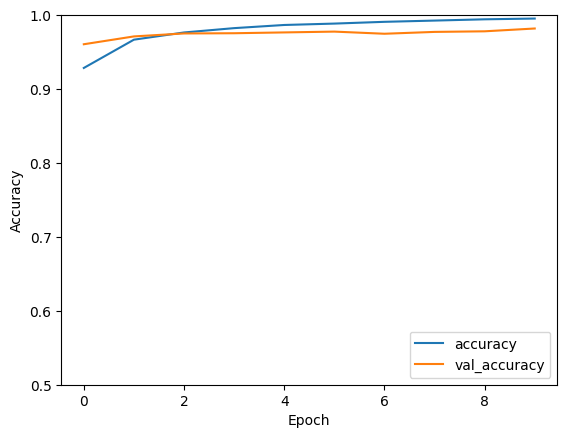

313/313 - 1s - loss: 0.0683 - accuracy: 0.9819 - 503ms/epoch - 2ms/step
Test accuracy: 0.9818999767303467
313/313 [==============================] - 0s 1ms/step
Test label: 7
Prediction label: 7


In [25]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import matplotlib.pyplot as plt

# 加载MNIST数据集
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# 数据预处理
train_images = train_images / 255.0
test_images = test_images / 255.0

# 构建模型
model = models.Sequential([
 layers.Flatten(input_shape=(28, 28)),
 layers.Dense(128, activation='relu'),
 layers.Dense(10)
])

# 编译模型
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# 训练模型
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# 可视化模型性能
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

# 测试模型
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print(f'Test accuracy: {test_acc}')

# 模型预测
predictions = model.predict(test_images)
print(f'Test label: {test_labels[0]}')
print(f'Prediction label: {tf.argmax(predictions[0])}')


## SENet

In [26]:
import tensorflow as tf

# 准备数据集
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# 将数据集处理为float32类型并归一化到[0,1]范围内
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# 将标签转化为one-hot编码格式
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# 定义Squeeze-and-Excitation模块
class SEBlock(tf.keras.layers.Layer):
    def __init__(self, channels, reduction_ratio=16, **kwargs):
        super(SEBlock, self).__init__(**kwargs)
        self.fc1 = tf.keras.layers.Dense(channels // reduction_ratio, activation='relu', name='se_fc1')
        self.fc2 = tf.keras.layers.Dense(channels, activation='sigmoid', name='se_fc2')

    def call(self, inputs):
        x = tf.keras.layers.GlobalAveragePooling2D()(inputs)
        x = self.fc1(x)
        x = self.fc2(x)
        x = tf.keras.layers.Reshape((1, 1, -1))(x)
        x = inputs * x
        return x

# 定义SENet模型
def create_SENet(input_shape, num_classes):
    input_tensor = tf.keras.Input(shape=input_shape)
    x = tf.keras.layers.Reshape(input_shape + (1,))(input_tensor)
    x = tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), padding='same', activation='relu')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(x)
    x = tf.keras.layers.Dropout(0.25)(x)

    x = tf.keras.layers.Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(x)
    x = tf.keras.layers.Dropout(0.25)(x)

    x = SEBlock(128)(x)

    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(units=64, activation='relu')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dropout(0.5)(x)
    output_tensor = tf.keras.layers.Dense(units=num_classes, activation='softmax')(x)

    model = tf.keras.Model(input_tensor, output_tensor)
    return model

# 创建并编译SENet模型
model = create_SENet(input_shape=(28, 28), num_classes=10)
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

# 训练模型
model.fit(x_train, y_train, batch_size=128, epochs=30, validation_split=0.1)

# 评价模型
model.evaluate(x_test, y_test)

# 使用模型进行预测
predictions = model.predict(x_test[:5])


Epoch 1/30
422/422 [==============================] - 13s 17ms/step - loss: 0.2184 - accuracy: 0.9360 - val_loss: 0.2055 - val_accuracy: 0.9507
Epoch 2/30
422/422 [==============================] - 7s 16ms/step - loss: 0.0700 - accuracy: 0.9795 - val_loss: 0.0413 - val_accuracy: 0.9883
Epoch 3/30
422/422 [==============================] - 6s 15ms/step - loss: 0.0525 - accuracy: 0.9847 - val_loss: 0.0282 - val_accuracy: 0.9923
Epoch 4/30
422/422 [==============================] - 6s 15ms/step - loss: 0.0400 - accuracy: 0.9879 - val_loss: 0.0226 - val_accuracy: 0.9937
Epoch 5/30
422/422 [==============================] - 6s 15ms/step - loss: 0.0340 - accuracy: 0.9893 - val_loss: 0.0324 - val_accuracy: 0.9907
Epoch 6/30
422/422 [==============================] - 6s 15ms/step - loss: 0.0327 - accuracy: 0.9904 - val_loss: 0.0270 - val_accuracy: 0.9927
Epoch 7/30
422/422 [==============================] - 6s 15ms/step - loss: 0.0291 - accuracy: 0.9912 - val_loss: 0.0278 - val_accuracy: 0.992